In [50]:
from sympy import symbols, solve, Eq, init_printing

init_printing(use_latex=True)

Now we can calculate the transfer function `Hio4`

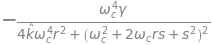

In [51]:
wc, r, s, gamma, k = symbols('\omega_c, r, s, gamma, \hat{k}')

Hi2 = wc**2 / (s**2 + 2*r*wc*s + wc**2)

Hio4 = -gamma*Hi2*Hi2 / (1 + 4*k*r**2*Hi2*Hi2)
simplify(Hio4)

First we try out solving for $\gamma_0$ when the gain at DC is 1. This is done in the paper ($g_{dc} = 1$ in equation 26)

In [44]:
solve(Eq(Hio4.subs({s: 0}), 1), gamma)

⎡             2    ⎤
⎣- 4⋅\hat{k}⋅r  - 1⎦

Next we try out solving for $\gamma_0$ when the gain at $\omega_c$ is 1.

In [45]:
solve(Eq(Hio4.subs({s: wc}), 1), gamma)

⎡             2            2⎤
⎣- 4⋅\hat{k}⋅r  - 4⋅(r + 1) ⎦

Next we can find a value for $\gamma_0$ so that the gain is the same as for a standard 2-pole LP-SVF

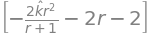

In [48]:
solve(Eq(Hio4.subs({s: wc}), Hi2.subs({s: wc})), gamma)

Finally we can find a value for $\gamma_0$ so that the gain is the same as for a standard 4-pole LP-SVF

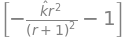

In [49]:
solve(Eq(Hio4.subs({s: wc}), (Hi2*Hi2).subs({s: wc})), gamma)